# 1. Lecture CSV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image

import wordcloud

In [2]:
# Permet d"afficher toute la largeur de chaque colonne
pd.set_option("display.max_colwidth", 200)

In [3]:
df_corpus = pd.read_csv("../datas/sample-data-clean-clusters.csv", index_col="id")
df_corpus.head()

,description,description_clean,description_nlp_ready,cluster
id,,,,
1,"Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space ...",active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space ...,active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin softness panel c...,0
2,Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93...,active sport boxer briefs skinning up glory requires enough movement without your boxers deciding to poach their own route the form fitting active sport boxer briefs are made from breathable ...,active sport boxer brief skin glory require movement boxer decide poach route form fit active sport boxer brief breathable recycle s fast wicke dry quickly spandex stretch seamless waistband soft ...,0
3,"Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7%...",active sport briefs these superbreathable no fly briefs are the minimalist s choice for high octane endeavors made from a blend of fast wicking quick drying polyester recycled and spand...,active sport brief superbreathable fly brief minimalist s choice high octane endeavor blend fast wicke quick dry recycle spandex stretch mesh support open mesh cool airflow soft edging leg opening...,0
4,"Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mo...",alpine guide pants skin in climb ice switch to rock traverse a knife edge ridge and boogie back down these durable weather resistant and breathable soft shell pants keep stride on every mo...,alpine guide pant skin climb ice switch rock traverse knife edge ridge boogie durable weather resistant breathable soft shell pant stride mountain endeavor midweight stretch weave won t restrict m...,1
5,"Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true ""best of all worlds"" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather t...",alpine wind jkt on high ridges steep ice and anything alpine this jacket serves as a true best of all worlds staple it excels as a stand alone shell for blustery rock climbs cool weather t...,alpine wind jkt high ridge steep ice alpine jacket serve true good world staple excel stand shell blustery rock climb cool weather trail run high output ski tour condition ice alpine climb functio...,1


---

# 2. Topic Modeling // Identification de thématiques

## 2.1 TF-IDF Matrix

In [4]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df_corpus["description_nlp_ready"])

dense = X.toarray()
dense.shape

(500, 3515)

500 documents pour 3515 mots

## 2.2 Truncated SVD

In [5]:
# SVD truncated, pour 15 thématiques
svd_model = TruncatedSVD(n_components=15, random_state=42)
lsa = svd_model.fit_transform(X)

In [6]:
lsa.shape

(500, 15)

15 thématiques demandées pour 500 articles

In [7]:
# lsa contient la représentation des 500 articles dans l’espace des 15 topics
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_{}".format(i+1) for i in range(15)], index=df_corpus.index)
topic_encoded_df["description"] = df_corpus["description_nlp_ready"].values
topic_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,description
id,,,,,,,,,,,,,,,,
1,0.256534,-0.053875,0.182863,0.095387,-0.109866,0.007574,-0.081814,0.040080,-0.129146,-0.071142,-0.024065,-0.039818,-0.048740,0.008834,0.003754,active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin softness panel c...
2,0.290276,-0.068081,0.094137,0.109715,-0.014206,0.153730,-0.032892,-0.000712,-0.081677,-0.105519,-0.058042,0.011551,-0.068590,0.040388,-0.083480,active sport boxer brief skin glory require movement boxer decide poach route form fit active sport boxer brief breathable recycle s fast wicke dry quickly spandex stretch seamless waistband soft ...
3,0.279335,-0.088918,0.102483,0.030013,-0.016572,0.139914,0.087199,0.046091,-0.045219,-0.048103,-0.038949,0.080168,-0.094765,0.071279,-0.092008,active sport brief superbreathable fly brief minimalist s choice high octane endeavor blend fast wicke quick dry recycle spandex stretch mesh support open mesh cool airflow soft edging leg opening...
4,0.404364,-0.280790,-0.145841,-0.140752,0.030747,-0.036612,-0.092633,-0.083563,-0.017853,-0.130114,-0.029352,-0.136827,-0.136883,-0.083536,-0.103876,alpine guide pant skin climb ice switch rock traverse knife edge ridge boogie durable weather resistant breathable soft shell pant stride mountain endeavor midweight stretch weave won t restrict m...
5,0.380160,-0.287268,-0.056197,-0.243041,-0.040021,-0.071207,0.021205,-0.014629,0.121580,-0.141862,-0.014108,-0.265793,-0.088247,0.242051,0.028126,alpine wind jkt high ridge steep ice alpine jacket serve true good world staple excel stand shell blustery rock climb cool weather trail run high output ski tour condition ice alpine climb functio...


## 2.3 Thématique principale de chaque document

In [8]:
topic_encoded_df["main_topic"] = [np.argmax(topic) for topic in lsa]
topic_encoded_df["main_topic"].value_counts()

main_topic
0     243
1      60
2      40
7      29
6      28
5      22
11     17
3      17
10      8
8       8
13      7
9       7
4       7
12      6
14      1
Name: count, dtype: int64

In [9]:
topic_encoded_df.head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,description,main_topic
id,,,,,,,,,,,,,,,,,
1,0.256534,-0.053875,0.182863,0.095387,-0.109866,0.007574,-0.081814,0.040080,-0.129146,-0.071142,-0.024065,-0.039818,-0.048740,0.008834,0.003754,active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin softness panel c...,0
2,0.290276,-0.068081,0.094137,0.109715,-0.014206,0.153730,-0.032892,-0.000712,-0.081677,-0.105519,-0.058042,0.011551,-0.068590,0.040388,-0.083480,active sport boxer brief skin glory require movement boxer decide poach route form fit active sport boxer brief breathable recycle s fast wicke dry quickly spandex stretch seamless waistband soft ...,0
3,0.279335,-0.088918,0.102483,0.030013,-0.016572,0.139914,0.087199,0.046091,-0.045219,-0.048103,-0.038949,0.080168,-0.094765,0.071279,-0.092008,active sport brief superbreathable fly brief minimalist s choice high octane endeavor blend fast wicke quick dry recycle spandex stretch mesh support open mesh cool airflow soft edging leg opening...,0
4,0.404364,-0.280790,-0.145841,-0.140752,0.030747,-0.036612,-0.092633,-0.083563,-0.017853,-0.130114,-0.029352,-0.136827,-0.136883,-0.083536,-0.103876,alpine guide pant skin climb ice switch rock traverse knife edge ridge boogie durable weather resistant breathable soft shell pant stride mountain endeavor midweight stretch weave won t restrict m...,0
5,0.380160,-0.287268,-0.056197,-0.243041,-0.040021,-0.071207,0.021205,-0.014629,0.121580,-0.141862,-0.014108,-0.265793,-0.088247,0.242051,0.028126,alpine wind jkt high ridge steep ice alpine jacket serve true good world staple excel stand shell blustery rock climb cool weather trail run high output ski tour condition ice alpine climb functio...,0
6,0.382929,-0.251360,-0.102307,-0.230108,0.011148,-0.113166,-0.009113,-0.087238,0.061067,-0.092704,-0.008735,-0.059429,0.025241,-0.050793,-0.068602,ascensionist jkt technical soft shell mountain pursuit strike alpinist s balance protection minimalism dense way stretch double weave stitchless seam exceptional water wind resistance rapid dry ti...,0
7,0.253191,-0.152090,-0.075878,-0.229047,0.047135,0.086271,0.090562,0.430890,0.023998,-0.013245,-0.029104,-0.019560,0.025008,-0.084715,0.025008,atom multitasker s cloud atom play courier bag daypack carry teardrop shape provide support daypack position load shoulder single strap design make get good simple spin large zippered main interna...,7
8,0.145006,-0.031861,-0.032260,0.061264,0.075426,0.310224,0.299368,-0.187132,-0.079840,-0.136204,0.023337,-0.053933,0.262275,0.007501,0.260617,print band betina btm full coverage bottom betina fit highest hip slightly scoop line blend nylon spandex detail full coverage fit high hip coverage regular rise improve nylon spandex weight g usa,5
9,0.271294,-0.068619,-0.025960,-0.044648,-0.052056,-0.164877,0.009609,-0.082718,0.128288,-0.141596,0.032215,0.210369,-0.022628,-0.072424,0.121930,baby micro d luxe cardigan micro d luxe heavenly soft earth application cardigan quick dry durable recycle microdeni fleece lightweight breathable work midlayer wind flap back zip hood cover elast...,0


## 2.4 Wordcloud des thématiques

In [10]:
the_north_face_mask = np.array(Image.open("../utils/mountain.jpg"))
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color="steelblue", mask = the_north_face_mask)

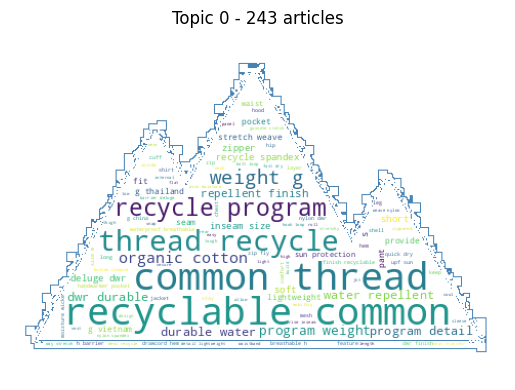

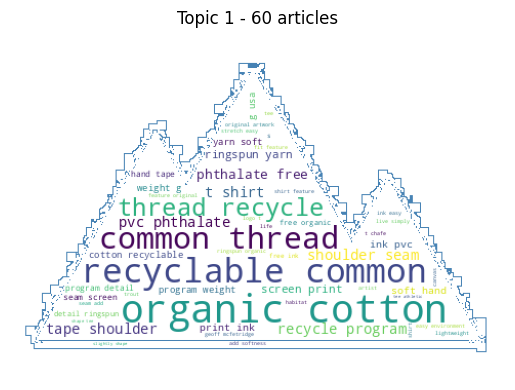

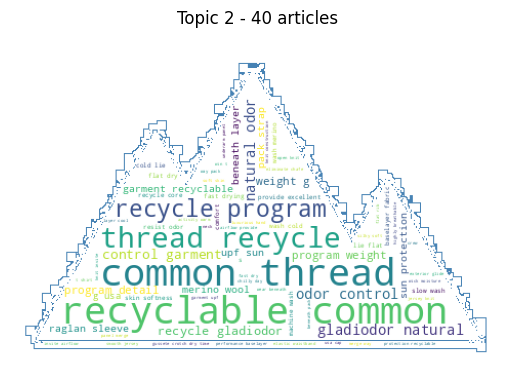

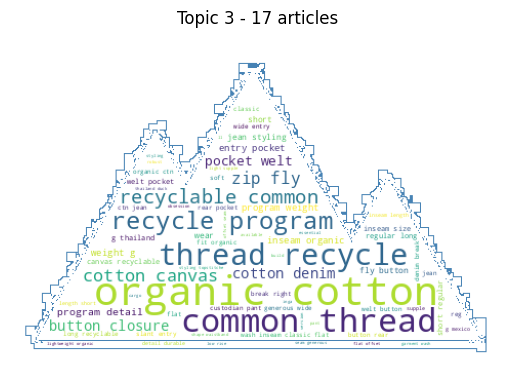

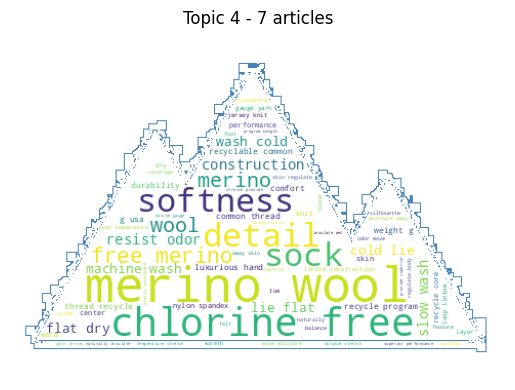

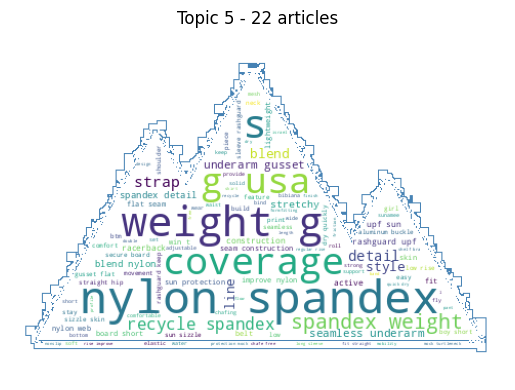

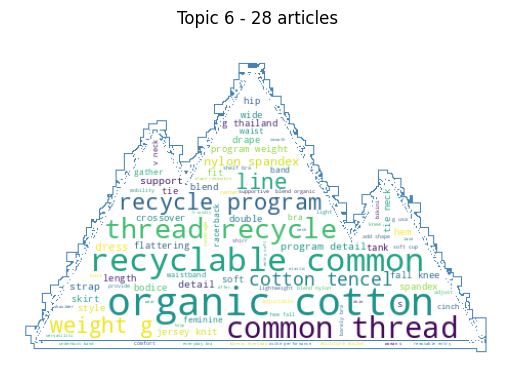

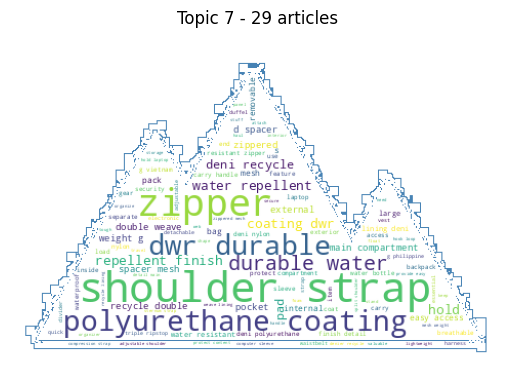

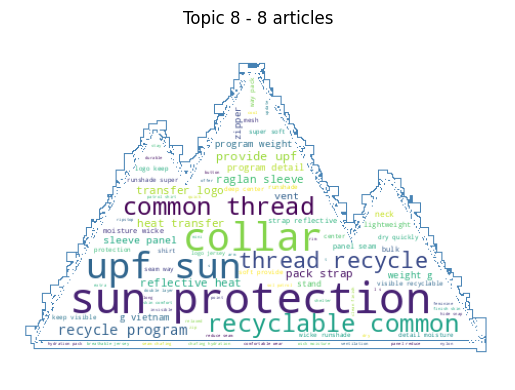

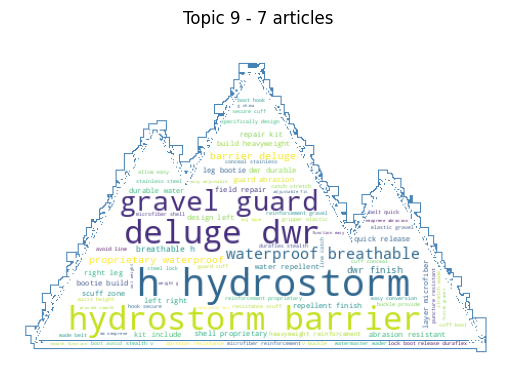

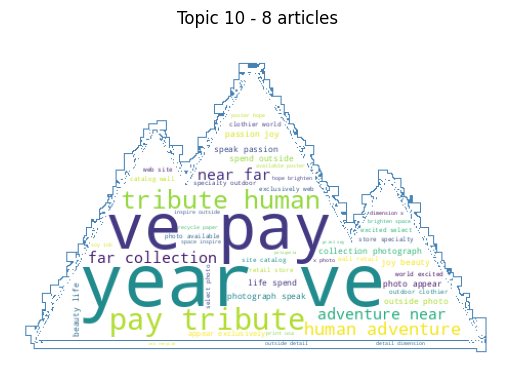

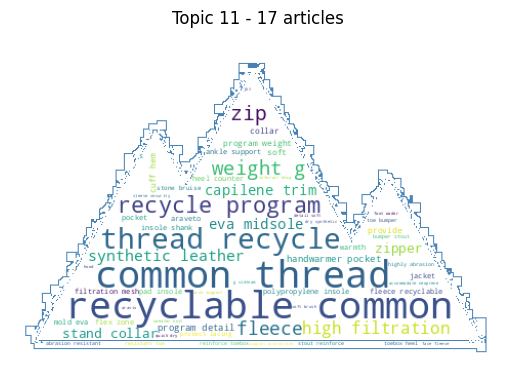

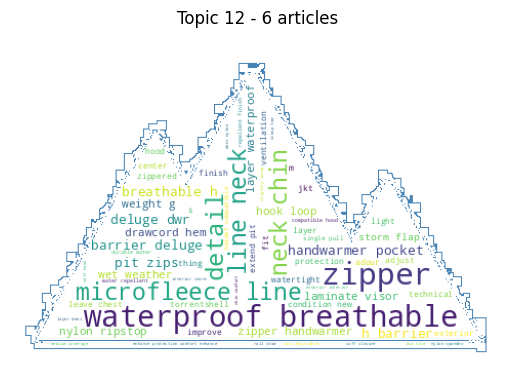

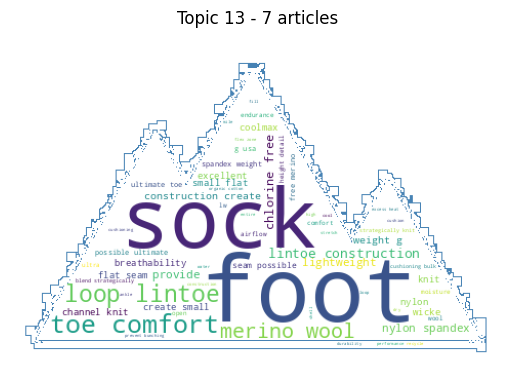

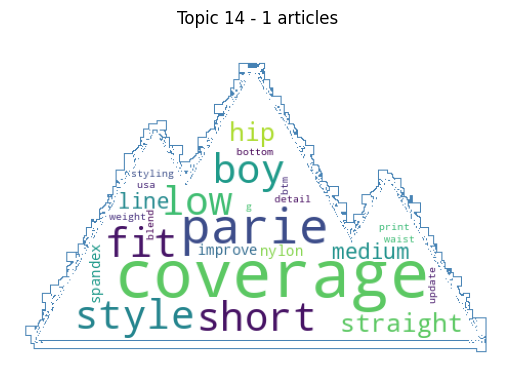

In [11]:
# WordCloud à partir des mots présents dans les descriptions des documents associés à un main_topic
topics = topic_encoded_df["main_topic"].unique()

for topic in sorted(topics):
    mask_topic = (topic_encoded_df["main_topic"] == topic)
    products_topic = topic_encoded_df[mask_topic]["description"].tolist()
    texte = " ".join(products_topic)
    cloud = wd.generate(texte)
    
    plt.imshow(cloud)
    plt.title(f"Topic {topic} - {len(products_topic)} articles")
    plt.axis("off")
    plt.show()

---

Sauvegarde du fichier avec lsa

In [12]:
df_corpus["main_topic"] = topic_encoded_df["main_topic"]

In [13]:
df_corpus.to_csv("../datas/sample-data-clean-clusters-lsa.csv")